In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Set plot style
sns.set(style="whitegrid")

# Load the dataset
# Assumption: The CSV file is in the same directory as this notebook
df = pd.read_csv("ToyotaCorolla - MLR.csv")

# Display first few rows to understand the data structure [cite: 5, 29]
print("Dataset Head:")
display(df.head())

# Check column names and data types
print("\nDataset Info:")
print(df.info())

Dataset Head:


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None


In [2]:
# 1. Summary Statistics
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [3]:
# 2. Check for Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


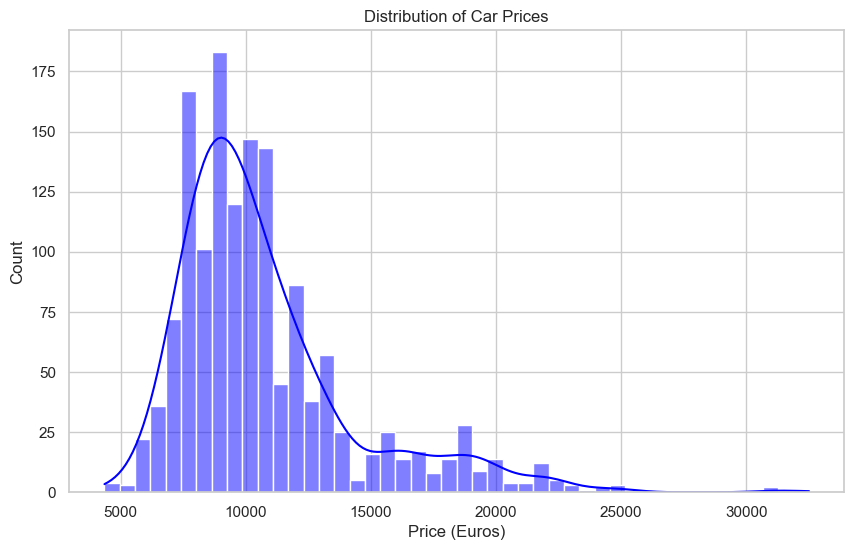

In [4]:
# 3. Visualization: Distribution of the Target Variable (Price)
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, color='blue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price (Euros)')
plt.show()

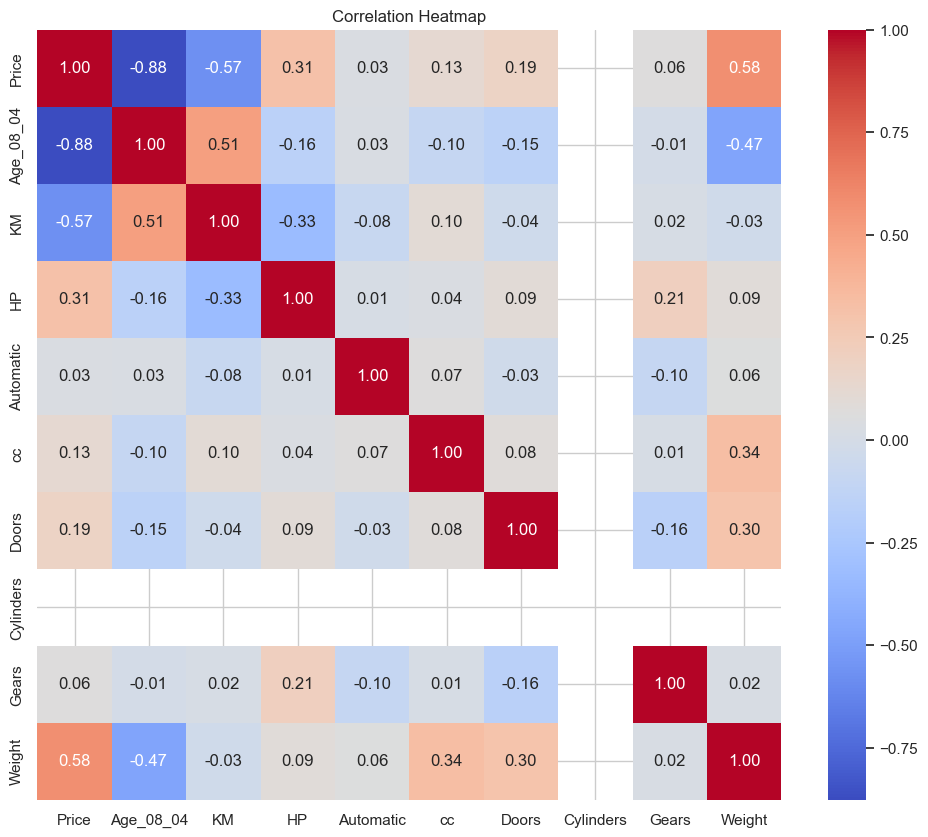

In [5]:
# 4. Visualization: Correlation Matrix (Numerical Features)
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [6]:
# 1. Handling 'Cylinders'
print("Unique values in 'Cylinders':", df['Cylinders'].unique())
if df['Cylinders'].nunique() == 1:
    df = df.drop('Cylinders', axis=1)
    print("Dropped 'Cylinders' column due to zero variance.")

# 2. Encoding Categorical Variables
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

# 3. Final check of the dataframe
print("\nProcessed Dataframe columns:")
print(df.columns)

Unique values in 'Cylinders': [4]
Dropped 'Cylinders' column due to zero variance.

Processed Dataframe columns:
Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Gears',
       'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')


In [7]:
# Define Features (X) and Target (y)
y = df['Price']
X = df.drop('Price', axis=1)

# Split into Training and Testing sets (80% Train, 20% Test) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")

Training shape: (1148, 10)
Testing shape: (288, 10)


In [8]:
# --- Model 1: Baseline Multiple Linear Regression (All Features) ---
model_1 = LinearRegression()
model_1.fit(X_train, y_train)


features_significant = ['Age_08_04', 'KM', 'Weight', 'HP']
X_train_sig = X_train[features_significant]
X_test_sig = X_test[features_significant]

model_2 = LinearRegression()
model_2.fit(X_train_sig, y_train)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_3 = LinearRegression()
model_3.fit(X_train_scaled, y_train)

print("Models trained successfully.")

Models trained successfully.


In [9]:
def evaluate_model(name, model, features, target_true):
    pred = model.predict(features)
    r2 = r2_score(target_true, pred)
    rmse = np.sqrt(mean_squared_error(target_true, pred))
    mae = mean_absolute_error(target_true, pred)
    print(f"--- {name} Performance ---")
    print(f"R2 Score: {r2:.4f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}\n")

print("Evaluation on Test Data:\n")
evaluate_model("Model 1 (All Features)", model_1, X_test, y_test)
evaluate_model("Model 2 (Significant Features)", model_2, X_test_sig, y_test)
evaluate_model("Model 3 (Standardized)", model_3, X_test_scaled, y_test)

# Interpretation of Coefficients for Model 1 [cite: 20]
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model_1.coef_})
print("\nModel 1 Coefficients Interpretation:")
print(coef_df.sort_values(by='Coefficient', ascending=False))

Evaluation on Test Data:

--- Model 1 (All Features) Performance ---
R2 Score: 0.8349
RMSE: 1484.27
MAE: 990.89

--- Model 2 (Significant Features) Performance ---
R2 Score: 0.8506
RMSE: 1411.85
MAE: 1001.20

--- Model 3 (Standardized) Performance ---
R2 Score: 0.8349
RMSE: 1484.27
MAE: 990.89


Model 1 Coefficients Interpretation:
            Feature  Coefficient
9  Fuel_Type_Petrol  1370.808910
6             Gears   551.600710
3         Automatic   148.830927
7            Weight    25.884958
2                HP    14.039479
1                KM    -0.016231
4                cc    -0.030372
5             Doors   -60.310974
8  Fuel_Type_Diesel   -68.548757
0         Age_08_04  -120.830458


In [10]:


# Ridge Regression (L2 Regularization)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Lasso Regression (L1 Regularization)
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled, y_train)

print("Regularization Results:\n")
evaluate_model("Ridge Regression", ridge_model, X_test_scaled, y_test)
evaluate_model("Lasso Regression", lasso_model, X_test_scaled, y_test)

Regularization Results:

--- Ridge Regression Performance ---
R2 Score: 0.8350
RMSE: 1483.56
MAE: 990.86

--- Lasso Regression Performance ---
R2 Score: 0.8351
RMSE: 1483.24
MAE: 991.02



In [11]:
# Interview Questions: 

In [12]:
# 1.What is Normalization & Standardization and how is it helpful?
# Normalization (Min–Max scaling):  
# Rescales values to a fixed range (usually [0,1]) using:  

# x_scaled = (x − mean) / standard deviation

# - Useful when you want bounded features (e.g., for neural networks).

# Standardization (Z-score scaling): 
# Rescales to zero mean and unit variance using:  

# x_scaled = (x − minimum value) / (maximum value − minimum value) 

# - Helpful when different features have different units/scales.  
# - Important for methods assuming centered/scaled inputs (e.g., regularized regression, PCA, k-NN).

# Why it is helpful:  
# - Algorithms that use distances or regularization penalize coefficients.  
# - If features have different scales, large-scale features can dominate.  
# - Standardization ensures comparable feature scales and stabilizes optimization.

In [13]:
# 2.What techniques can be used to address multicollinearity in multiple linear regression?
# 1. Remove or combine correlated features:
#    - Drop one of a pair of highly correlated variables.  
#    - Or create a composite index (e.g., via PCA).

# 2. Principal Component Regression (PCR):
#    - Use principal components instead of original features.

# 3. Partial Least Squares (PLS): 
#    - Uses response information to form components.

# 4. Regularization: 
#    - Ridge regression (L2): shrinks coefficients, reduces variance from multicollinearity.  
#    - Lasso (L1): can set some coefficients to zero, performing variable selection.

# 5. Centering predictors:  
#    - Sometimes helpful for interaction terms.

# 6. Variance Inflation Factor (VIF):  
#    - Detects which variables cause multicollinearity.  
#    - VIF > 10 is often considered a flag.